<h1 align="center">
PROYECTO:    
    
<h6 align="center"> ANÁLISIS DE LAS CAUSALES DE INCENDIOS FORESTALES EN REPÚBLICA DOMINICANA EN LOS ÚLTIMOS 5 AÑOS. </h6>

</h1>

El proyecto de análisis de las causas de los incendios forestales en la República Dominicana genera varios valores sociales importantes. En primer lugar, desde una perspectiva medioambiental, busca contribuir a la preservación y protección de los recursos naturales del país, especialmente sus bosques y áreas forestales.

Reducir la incidencia de incendios forestales podría ayudar a conservar la biodiversidad, proteger los hábitats de la vida silvestre y mitigar el cambio climático al preservar los sumideros de carbono. Además, desde un punto de vista social, el proyecto busca proteger las comunidades cercanas a estas áreas, así como la infraestructura y los recursos económicos que dependen de los ecosistemas forestales.


### Indice:
- Fuentes de datos.
- Preguntas de análisis.
- Desarrollo.
- Conclusiones.
- Participantes.

#### Fuentes de datos:

- ###### Kaggle: https://www.kaggle.com/datasets/mbritofer/datosabiertosrd

- ###### Ministerio de Medios Ambiente: https://ambiente.gob.do/informacion-ambiental/estadisticas-ambientales/#548-720-2023-bosque

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [113]:
data = pd.read_csv("./data/Incendios-Forestales-2021.csv", parse_dates=["Fecha origen", "Fecha Extincion"])
data.rename({"Mes de origen ": "Mes de origen"}, axis=1, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               250 non-null    int64         
 1   no.                      250 non-null    int64         
 2   Municipio                250 non-null    object        
 3   Provincia                250 non-null    object        
 4   Mes de origen            250 non-null    object        
 5   Dia de origen            250 non-null    int64         
 6   Mes de extincion         250 non-null    object        
 7   Dia extincion            250 non-null    int64         
 8   Causas                   250 non-null    object        
 9   Area Afectada en Tareas  250 non-null    int64         
 10  Metros Cuadrados         250 non-null    float64       
 11  Mes de origen .1         250 non-null    int64         
 12  Fecha origen             250 non-nul

In [114]:
data.head(5)

,Unnamed: 0,no.,Municipio,Provincia,Mes de origen,Dia de origen,Mes de extincion,Dia extincion,Causas,Area Afectada en Tareas,Metros Cuadrados,Mes de origen .1,Fecha origen,Fecha Extincion,Fecha Mes
0,0,1,Pedernales,Pedernales,Enero,5,Enero,7,Desconocida,665,418152.0,1,2021-01-05,2021-01-07,Jan-2021
1,1,2,Pedro Santana,Elías Piña,Enero,13,Enero,13,Conuquismo,95,59736.0,1,2021-01-13,2021-01-13,Jan-2021
2,2,3,Constanza,La Vega,Enero,3,Enero,3,Desconocida,1,628.8,1,2021-01-03,2021-01-03,Jan-2021
3,3,4,SAJOMA,Santiago,Enero,16,Enero,16,Desconocida,45,28296.0,1,2021-01-16,2021-01-16,Jan-2021
4,4,5,La Vega,La Vega,Enero,15,Enero,15,Intencional,8,5030.4,1,2021-01-15,2021-01-15,Jan-2021


# Preguntas de análisis:

## ¿Cuáles son las causas más comunes de los incendios forestales? (Refactoriazada)

In [115]:
df_causes = data.loc[:, ["Causas"]]

In [116]:
causes = data["Causas"].value_counts()

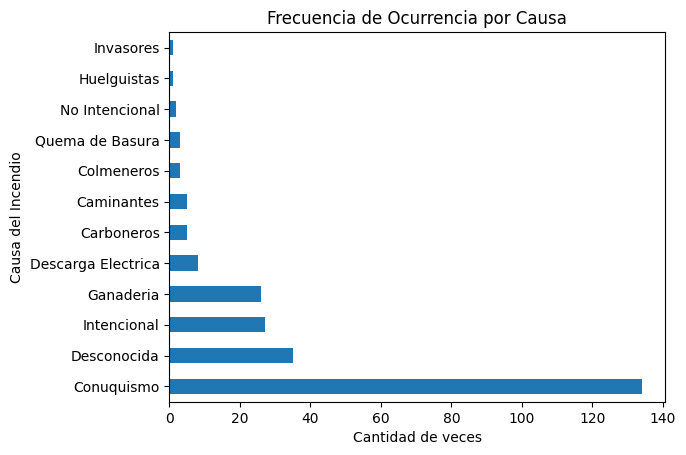

In [117]:
# Graficar
causes.plot(kind='barh')

# Agregar etiquetas y título
plt.xlabel('Cantidad de veces')
plt.ylabel('Causa del Incendio')
plt.title('Frecuencia de Ocurrencia por Causa')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los municipios/provincias más afectados por los incendios forestales?(Refactorizada)


### Municipios

In [118]:
df_forest_fires = data.loc[:, ["Municipio","Provincia"]]

df_all_municipalities =  df_forest_fires["Municipio"].value_counts()


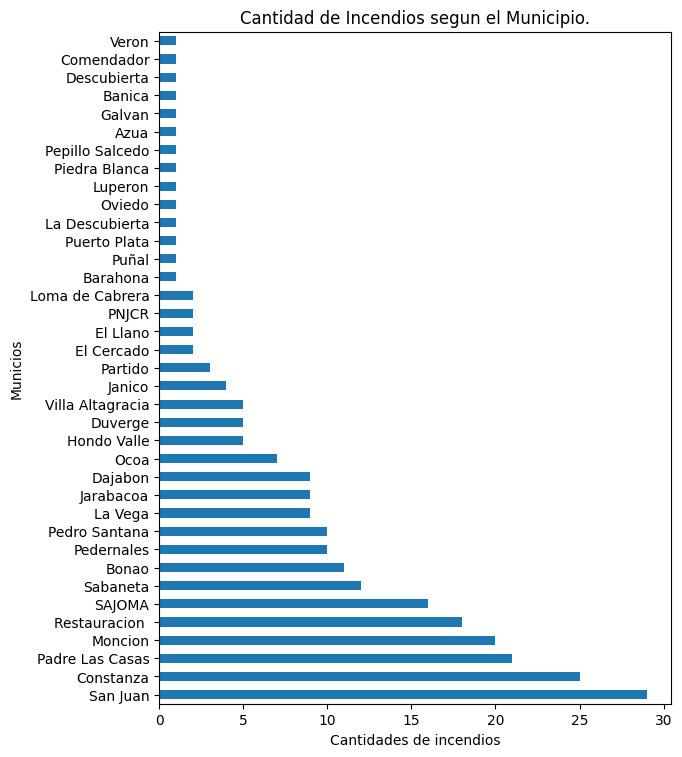

In [119]:
df_all_municipalities.plot(kind='barh')
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.1)

# Agregar etiquetas y título
plt.xlabel('Cantidades de incendios')
plt.ylabel('Municios')
plt.title('Cantidad de Incendios segun el Municipio.')

# Mostrar el gráfico
plt.show()

### Provincias

In [120]:
df_all_province = df_forest_fires["Provincia"].value_counts()

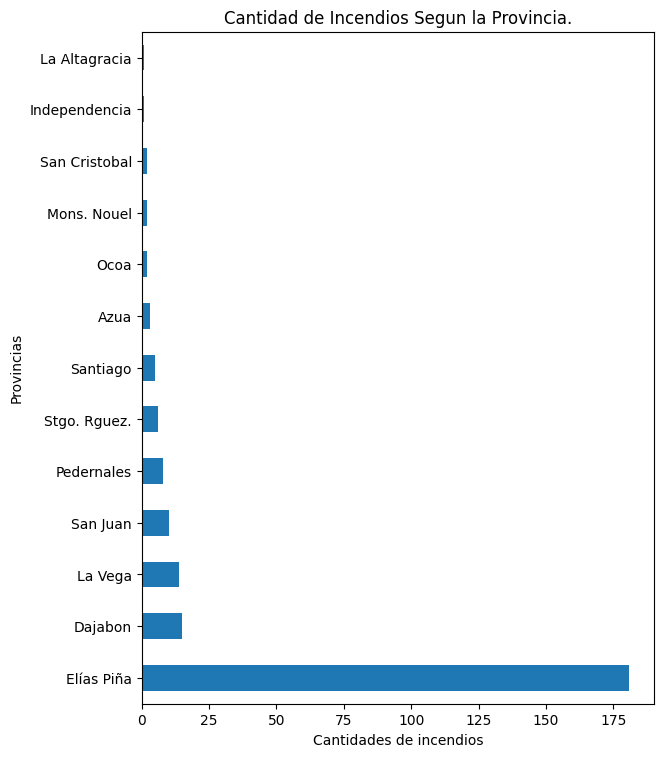

In [121]:
df_all_province.plot(kind='barh')
plt.subplots_adjust(left=0.1, right=0.9, top=1.5, bottom=0.1)

# Agregar etiquetas y título
plt.xlabel('Cantidades de incendios')
plt.ylabel('Provincias')
plt.title('Cantidad de Incendios Segun la Provincia.')

# Mostrar el gráfico
plt.show()

In [122]:
import folium
# Coordenadas
coordenadas_provincia_mas_afectada = [
    [19.177711, -71.321072],
    [19.107247, -71.351460],
    [19.124213, -71.467486],
    [19.000188, -71.519974],
    [18.945327, -71.642907],
    [18.938085, -71.618160],
    [18.891633, -71.637928],
    [18.883186, -71.653233],
    [18.875946, -71.632189],
    [18.886203, -71.616884],
    [18.804777, -71.630145],
    [18.783268, -71.567662],
    [18.657242, -71.577690],
    [18.677290, -71.784762],
    [18.705925, -71.788541],
    [18.722388, -71.737907],
    [18.881209, -71.724303],
    [18.907598, -71.768656],
    [18.954779, -71.782260],
    [18.942628, -71.881261],
    [18.942628, -71.881261],
    [18.959782, -71.887307],
    [18.959782, -71.887307],
    [19.134874, -71.647647],
    [19.281773, -71.591141],
    [19.173181, -71.318580]
]


# Crear un mapa centrado en la República Dominicana
mapa = folium.Map(location=[18.735693, -70.162651], zoom_start=9)


In [123]:

# Marcar las coordenadas
folium.Polygon(locations=coordenadas_provincia_mas_afectada, color='blue', fill=True, fill_color='blue', fill_opacity=0.4).add_to(mapa)

In [124]:

# Mostrar el mapa
mapa

## ¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?


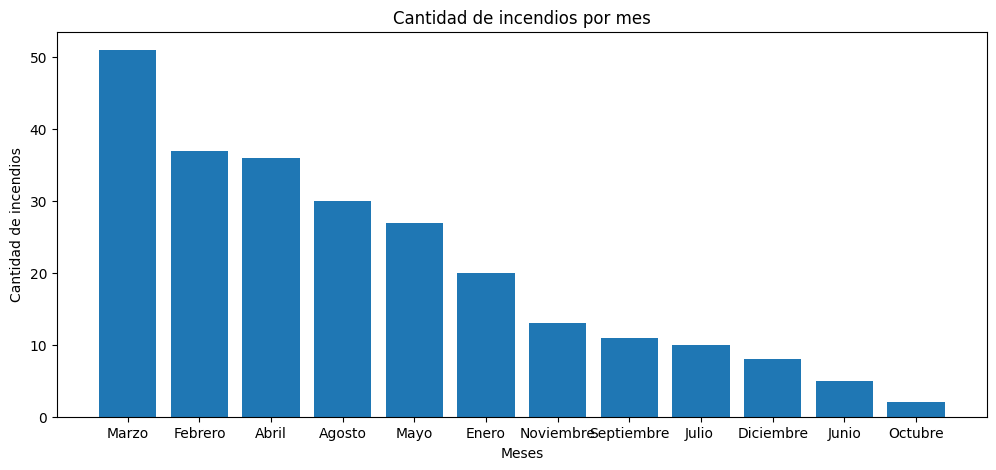

In [125]:
#¿Hay algún patrón estacional en la ocurrencia de los incendios forestales?

def fr_mes(fire):
    #Crea una serie con la cantidad de incendios por mes 
    fire_mes = pd.Series(fire["Mes de origen"].value_counts())

    #Grafica la informacion obtenida
    plt.figure(figsize=(12, 5))
    plt.bar(fire_mes.index, fire_mes.values)
    plt.title("Cantidad de incendios por mes")
    plt.xlabel("Meses")
    plt.ylabel("Cantidad de incendios")
    plt.show()


fr_mes(data)

## ¿Cuál es la duración promedio de un incendio forestal?

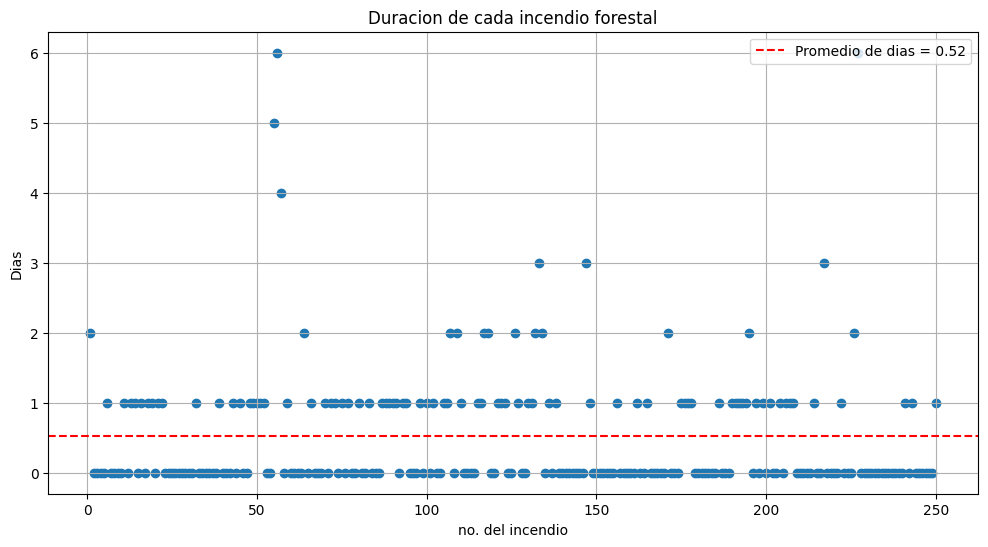

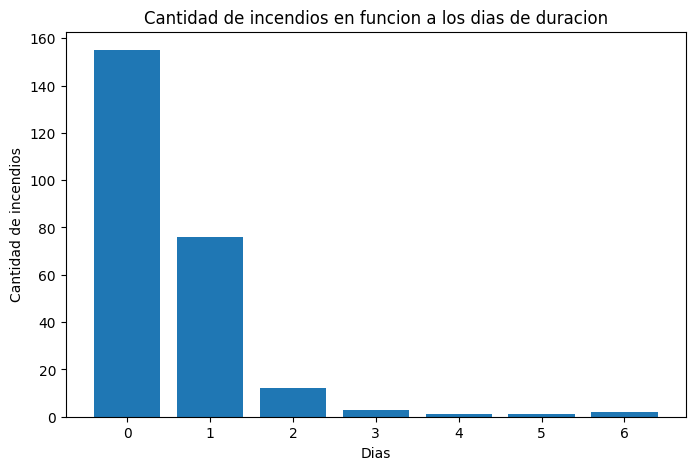

In [126]:
#¿Cuál es la duración promedio de un incendio forestal?

def d_prom(fire): #extrae la duracion promedio de los incendios en el dataframe
    #Crea otro DataFrame solo con las columnas deseadas
    delete = ["Municipio", "Provincia", "Fecha Mes", "Causas", "Area Afectada en Tareas", "Metros Cuadrados", "Dia de origen", "Dia extincion"]
    f_clean = fire.drop(delete, axis= 1).sort_values(by='no.')

    #Convierte el continido de las columnas a utilizar en tipo DateTime
    f_clean["Fecha origen"] = pd.to_datetime(f_clean["Fecha origen"], format='%m/%d/%Y')
    f_clean["Fecha Extincion"] = pd.to_datetime(f_clean["Fecha Extincion"], format='%m/%d/%Y')

    #Se descubrio que algunas informaciones sobre meses estaban erroneas, por lo que a continuacion se corrigen
    f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'] = f_clean.loc[f_clean['Fecha Extincion'] < f_clean['Fecha origen'], 'Fecha Extincion'].apply(sum_m)

    #Crea otra columna con la diferencia en dias entre la fecha de inicio de los incendios y la fecha de extincion
    f_clean["Duracion en Dias"] = (f_clean["Fecha Extincion"] - f_clean["Fecha origen"]).dt.days

    #Grafica Duracion de cada incendio forestal
    plt.figure(figsize=(12, 6))
    plt.scatter(f_clean["no."], f_clean["Duracion en Dias"])
    plt.title("Duracion de cada incendio forestal")
    plt.xlabel("no. del incendio")
    plt.ylabel("Dias")
    plt.grid()
    prom = np.mean(f_clean["Duracion en Dias"])
    plt.axhline(y=prom, color='r', linestyle='--', label=f'Promedio de dias = {prom:.2f}')
    plt.legend(loc='upper right')
    plt.show()
    
    #Grafica Cantidad de incendios en funcion a los dias de duracion
    dat = f_clean["Duracion en Dias"].value_counts()
    plt.figure(figsize=(8, 5))
    plt.bar(dat.index, dat.values)
    plt.title("Cantidad de incendios en funcion a los dias de duracion")
    plt.xlabel("Dias")
    plt.ylabel("Cantidad de incendios")
    plt.show()

    #print(f_clean.sort_values(by='Duracion en Dias'))


def sum_m(fecha):
  fecha = dt.strftime(fecha, "%m-%d-%Y")
  m, d, y = fecha.split("-")
  m = int(m) + 1
  return dt.strptime(f"{m}-{d}-{y}", "%m-%d-%Y")

d_prom(data)

### ¿Existe alguna relación entre las causas de los incendios y la duración o el tamaño del área afectada?

Se pueden realizar análisis de correlación para determinar si ciertas causas están asociadas con incendios más grandes o de mayor duración.

##### Tiempo promedio tomado para erradiar los incendios, según la causa y la provincia.


In [127]:
# Tiempo promedio tomado para erradiar los incendios, según la causa
import datetime

datav2 = data.copy()

datav2["Duracion Promedio Ext."] =  datav2["Fecha Extincion"] - datav2["Fecha origen"]
datav2 = datav2.groupby(["Causas"])["Duracion Promedio Ext."].mean()
datav2.sort_values()

Causas
No Intencional                 0 days 00:00:00
Quema de Basura                0 days 00:00:00
Desconocida          0 days 06:10:17.142857142
Caminantes                     0 days 09:36:00
Conuquismo           0 days 10:44:46.567164179
Carboneros                     0 days 14:24:00
Colmeneros                     0 days 16:00:00
Intencional                    0 days 17:46:40
Ganaderia            0 days 19:23:04.615384615
Invasores                      1 days 00:00:00
Descarga Electrica             1 days 03:00:00
Huelguistas                    3 days 00:00:00
Name: Duracion Promedio Ext., dtype: timedelta64[ns]

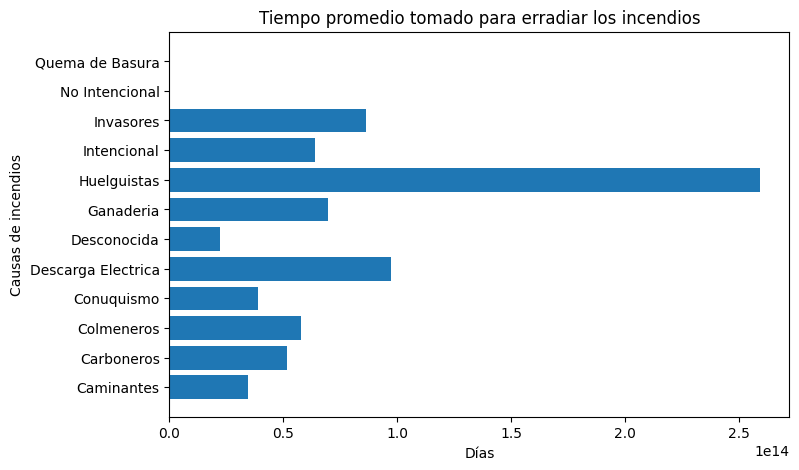

In [128]:
plt.figure(figsize=(8, 5))
plt.barh(datav2.index, datav2.values)
plt.title("Tiempo promedio tomado para erradiar los incendios")
plt.xlabel("Días")
plt.ylabel("Causas de incendios")
plt.show()

##### Metros cuadrados totales afectados por tipo de causa.

In [129]:
causes_meter = data.groupby(["Causas"]).agg({"Metros Cuadrados":"sum", "no.":"size"}).reset_index()
causes_meter

,Causas,Metros Cuadrados,no.
0,Caminantes,496123.2,5
1,Carboneros,468456.0,5
2,Colmeneros,562776.0,3
3,Conuquismo,21695486.4,134
4,Descarga Electrica,17426563.2,8
5,Desconocida,2250475.2,35
6,Ganaderia,2154268.8,26
7,Huelguistas,78600.0,1
8,Intencional,2435971.2,27
9,Invasores,37728.0,1


<Axes: ylabel='Causas'>

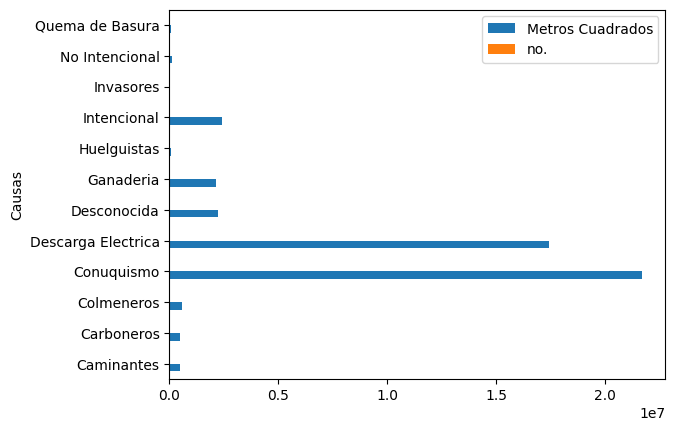

In [130]:
causes_meter.plot.barh(x="Causas")

### ¿Cuál es la tendencia de los incendios forestales a lo largo del tiempo?

Al analizar la columna de fecha de origen, se pueden identificar tendencias a lo largo de los años, como si la frecuencia o la magnitud de los incendios ha aumentado o disminuido con el tiempo.

In [131]:
forest_fire_trend = data.groupby("Mes de origen")["Mes de origen"].size()
forest_fire_trend.sort_values(ascending=False).reset_index(name = "Cant. Incendios")

,Mes de origen,Cant. Incendios
0,Marzo,51
1,Febrero,37
2,Abril,36
3,Agosto,30
4,Mayo,27
5,Enero,20
6,Noviembre,13
7,Septiembre,11
8,Julio,10
9,Diciembre,8


In [132]:
forest_fire_trend
#plt.scatter(forest_fire_trend)
#plt.show()

Mes de origen
Abril         36
Agosto        30
Diciembre      8
Enero         20
Febrero       37
Julio         10
Junio          5
Marzo         51
Mayo          27
Noviembre     13
Octubre        2
Septiembre    11
Name: Mes de origen, dtype: int64

# Resumen de incendios (2000 a 2024)

<Axes: xlabel='Años'>

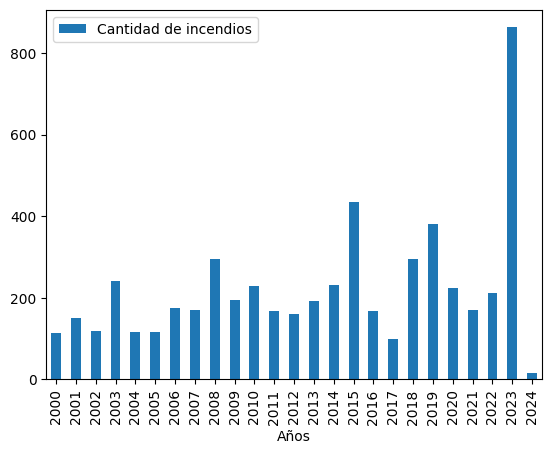

In [133]:
incendios_2000_act = pd.read_csv("./data/Incendios-Forestales-Ocurridos-2000-2024-ene.csv")
incendios_2000_act.set_index("Años")

incendios_2000_act.plot.bar(x="Años", y="Cantidad de incendios")

In [134]:
causa_2k21_to_2k24 = pd.read_csv("./data/Incendio-ocurridos-por-causa-2021-2024.csv")
resumen = causa_2k21_to_2k24.groupby(["Causa del Incendio", "Año"])["Cantidad de incendio"].sum().reset_index(name = "Cant. incendios").set_index("Año")
resumen

,Causa del Incendio,Cant. incendios
Año,,
2021,Accidental,2
2023,Accidental,3
2022,Accidental,2
2023,Buzos Basurero,3
2022,Cable electrico,4
2023,Cable eléctrico,14
2024,Cable eléctrico,1
2021,Caminantes,5
2023,Caminantes,8
